In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn

from utils import *
from model import *

In [74]:
device = get_default_device()

In [75]:
#normal = pd.read_csv('C:/Users/유근태/workspace/TSD_AD/Dataset/WADI/WaDi.A2_19 Nov 2019/WADI.A2_19 Nov 2019/WADI_14days_new.csv')

normal = pd.read_csv('C:/Users/유근태/workspace/TSD_AD/Dataset/WADI/WaDi.A1_9 Oct 2017/WADI.A1_9 Oct 2017/WADI_14days.csv',sep=',', skiprows=[0,1,2,3],skip_blank_lines=True)

normal

,Row,Date,Time,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_002_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_003_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_004_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_AIT_005_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_FIT_001_PV,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\1_LS_001_AL,...,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_MV_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_001_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_002_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_003_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\3_P_004_STATUS,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\LEAK_DIFF_PRESSURE,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\PLANT_START_STOP_LOG,\\WIN-25J4RO10SBF\LOG_DATA\SUTD_WADI\LOG_DATA\TOTAL_CONS_REQUIRED_FLOW
0,1,9/25/2017,6:00:00.000 PM,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
1,2,9/25/2017,6:00:01.000 PM,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
2,3,9/25/2017,6:00:02.000 PM,171.155,0.619473,11.5759,504.645,0.318319,0.001157,0,...,1,1,1,1,1,1,1,67.9651,1,0.68
3,4,9/25/2017,6:00:03.000 PM,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
4,5,9/25/2017,6:00:04.000 PM,171.155,0.607477,11.5725,504.673,0.318438,0.001207,0,...,1,1,1,1,1,1,1,67.1948,1,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1209596,1209597,10/9/2017,5:59:56.000 PM,164.211,0.511488,11.9928,482.452,0.331198,0.001182,0,...,1,1,1,1,1,1,1,62.8802,1,0.39
1209597,1209598,10/9/2017,5:59:57.000 PM,164.211,0.511488,11.9928,482.452,0.331198,0.001182,0,...,1,1,1,1,1,1,1,62.8802,1,0.39
1209598,1209599,10/9/2017,5:59:58.000 PM,164.211,0.511488,11.9928,482.452,0.331198,0.001182,0,...,1,1,1,1,1,1,1,62.8802,1,0.39
1209599,1209600,10/9/2017,5:59:59.000 PM,164.211,0.511488,11.9928,482.452,0.331198,0.001182,0,...,1,1,1,1,1,1,1,62.8802,1,0.39


In [76]:
normal = normal.drop(normal.columns[[0,1,2,50,51,86,87]],axis=1) # drop the empty columns and the date/time columns

#Downsampling
normal=normal.groupby(np.arange(len(normal.index)) // 5).mean()
normal.shape

(241921, 123)

In [77]:
# Transform all columns into float64
normal = normal.astype(float)

In [78]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x = normal.values
x_scaled = min_max_scaler.fit_transform(x)
normal = pd.DataFrame(x_scaled)

In [79]:
'''Note that there exists NaN in the dataframe'''
#normal.isnull().values.any()
# normal.isnull().sum()
normal.isnull().sum().sum()

np.int64(5)

In [80]:
normal=normal.fillna(0)

In [81]:
#Read data

attack = pd.read_csv('C:/Users/유근태/workspace/TSD_AD/Dataset/WADI/WaDi.A1_9 Oct 2017/WADI.A1_9 Oct 2017/WADI_attackdata.csv',sep=',')

attack.shape

(172801, 130)

In [82]:
from datetime import datetime

labels=[]

attack.reset_index()
for index, row in attack.iterrows():
    date_temp=row['Date']
    date_mask="%m/%d/%Y"
    date_obj=datetime.strptime(date_temp, date_mask)
    time_temp=row['Time']
    time_mask="%I:%M:%S.%f %p"
    time_obj=datetime.strptime(time_temp,time_mask)

    if date_obj==datetime.strptime('10/9/2017', '%m/%d/%Y'):
        if time_obj>=datetime.strptime('7:25:00.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('7:50:16.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue

    if date_obj==datetime.strptime('10/10/2017', '%m/%d/%Y'):
        if time_obj>=datetime.strptime('10:24:10.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('10:34:00.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('10:55:00.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:24:00.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('11:30:40.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:44:50.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('1:39:30.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('1:50:40.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('2:48:17.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('2:59:55.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('5:40:00.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('5:49:40.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('10:55:00.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('10:56:27.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
    
    if date_obj==datetime.strptime('10/11/2017', '%m/%d/%Y'):
        if time_obj>=datetime.strptime('11:17:54.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:31:20.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('11:36:31.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('11:47:00.000 AM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('11:59:00.000 AM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('12:05:00.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('12:07:30.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('12:10:52.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('12:16:00.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('12:25:36.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue
        elif time_obj>=datetime.strptime('3:26:30.000 PM', '%I:%M:%S.%f %p') and time_obj<=datetime.strptime('3:37:00.000 PM', '%I:%M:%S.%f %p'):
            labels.append('Attack')
            continue

    labels.append('Normal')

In [83]:
attack=attack.drop(attack.columns[[0,1,2,50,51,86,87]],axis=1) # Drop the empty and date/time columns

#Downsampling the attack data
attack=attack.groupby(np.arange(len(attack.index)) // 5).mean()
attack.shape

(34561, 123)

In [84]:
#Downsampling the labels
labels_down=[]
for i in range(len(labels)//5):
    if labels[5*i:5*(i+1)].count('Attack'):
        labels_down.append(1.0) #Attack
    else:
        labels_down.append(0.0) #Normal

#for the last few labels that are not within a full-length window
if labels[5*(i+1):].count('Attack'):
    labels_down.append(1.0) #Attack
else:
    labels_down.append(0.0) #Normal

print(len(labels_down))

34561


In [85]:
# Transform all columns into float64
attack = attack.astype(float)

In [86]:
from sklearn import preprocessing
x = attack.values 
x_scaled = min_max_scaler.transform(x)
attack = pd.DataFrame(x_scaled)

In [87]:
attack.head(2)

,0,1,2,3,4,5,6,7,8,9,...,113,114,115,116,117,118,119,120,121,122
0,0.766229,0.260764,0.984977,0.916341,0.575580,0.000210,0.0,0.0,0.483652,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174374,0.0,0.172566
1,0.766236,0.267854,0.984806,0.916332,0.576012,0.000131,0.0,0.0,0.483018,0.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.174314,0.0,0.172566


In [88]:
window_size=10

In [89]:
windows_normal=normal.values[np.arange(window_size)[None, :] + np.arange(normal.shape[0]-window_size)[:, None]]
windows_normal.shape

(241911, 10, 123)

In [90]:
windows_attack=attack.values[np.arange(window_size)[None, :] + np.arange(attack.shape[0]-window_size)[:, None]]
windows_attack.shape

(34551, 10, 123)

In [108]:
import torch.utils.data as data_utils

BATCH_SIZE =  8000
N_EPOCHS = 30
hidden_size = 100

w_size=windows_normal.shape[1]*windows_normal.shape[2]
z_size=windows_normal.shape[1]*hidden_size

windows_normal_train = windows_normal[:int(np.floor(.8 *  windows_normal.shape[0]))]
windows_normal_val = windows_normal[int(np.floor(.8 *  windows_normal.shape[0])):int(np.floor(windows_normal.shape[0]))]

train_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_train).float().view(([windows_normal_train.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

val_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_normal_val).float().view(([windows_normal_val.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

test_loader = torch.utils.data.DataLoader(data_utils.TensorDataset(
    torch.from_numpy(windows_attack).float().view(([windows_attack.shape[0],w_size]))
) , batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

model = USAD_model(w_size, z_size)
model = to_device(model,device)

In [109]:
history = training(N_EPOCHS,model,train_loader,val_loader) 

Epoch [1], val_loss1: 0.0257, val_loss2: 0.0248
Epoch [2], val_loss1: 0.0292, val_loss2: -0.0042
Epoch [3], val_loss1: 0.0367, val_loss2: -0.0165
Epoch [4], val_loss1: 0.0370, val_loss2: -0.0262
Epoch [5], val_loss1: 0.0437, val_loss2: -0.0328
Epoch [6], val_loss1: 0.0460, val_loss2: -0.0396
Epoch [7], val_loss1: 0.0470, val_loss2: -0.0422
Epoch [8], val_loss1: 0.0499, val_loss2: -0.0460
Epoch [9], val_loss1: 0.0512, val_loss2: -0.0481
Epoch [10], val_loss1: 0.0530, val_loss2: -0.0504
Epoch [11], val_loss1: 0.0570, val_loss2: -0.0539
Epoch [12], val_loss1: 0.0631, val_loss2: -0.0610
Epoch [13], val_loss1: 0.0659, val_loss2: -0.0641
Epoch [14], val_loss1: 0.0680, val_loss2: -0.0663
Epoch [15], val_loss1: 0.0691, val_loss2: -0.0675
Epoch [16], val_loss1: 0.0709, val_loss2: -0.0695
Epoch [17], val_loss1: 0.0725, val_loss2: -0.0712
Epoch [18], val_loss1: 0.0729, val_loss2: -0.0717
Epoch [19], val_loss1: 0.0735, val_loss2: -0.0724
Epoch [20], val_loss1: 0.0737, val_loss2: -0.0727
Epoch [21]

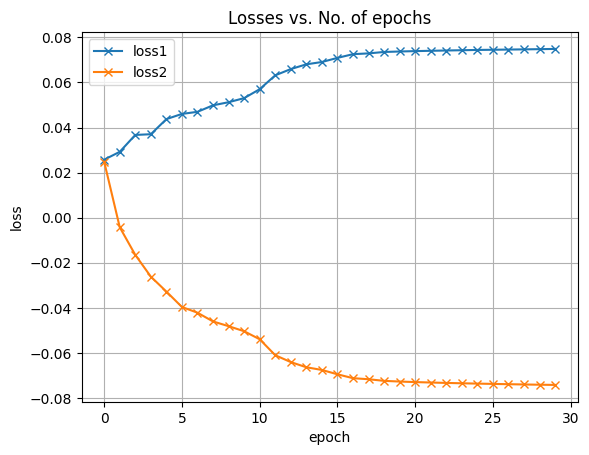

In [110]:
plot_history(history)

In [ ]:
torch.save({
            'encoder': model.encoder.state_dict(),
            'decoder1': model.decoder1.state_dict(),
            'decoder2': model.decoder2.state_dict()
            }, "model_WADI.pth")

In [ ]:
checkpoint = torch.load("model_WADI.pth")

model.encoder.load_state_dict(checkpoint['encoder'])
model.decoder1.load_state_dict(checkpoint['decoder1'])
model.decoder2.load_state_dict(checkpoint['decoder2'])

<All keys matched successfully>

In [113]:
results=testing_scores(model,test_loader,alpha=.5, beta=.5)

In [114]:
windows_labels=[]
for i in range(len(labels_down)-window_size):
    windows_labels.append(list(np.int_(labels_down[i:i+window_size])))

In [115]:
y_test = [1.0 if (np.sum(window) > 0) else 0 for window in windows_labels] # point adjustment

In [116]:
y_pred=np.concatenate([torch.stack(results[:-1]).flatten().detach().cpu().numpy(),
                              results[-1].flatten().detach().cpu().numpy()])

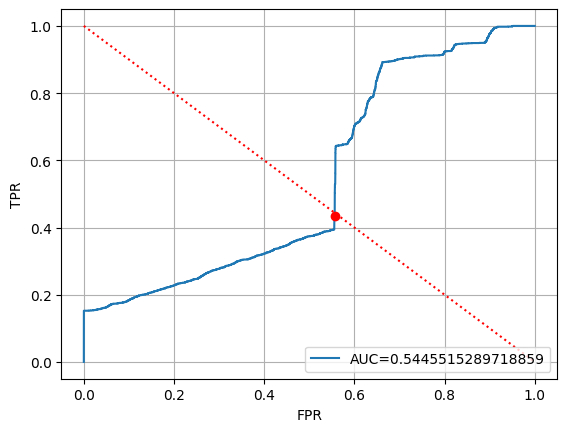

array([0.12589218], dtype=float32)

In [117]:
threshold=ROC(y_test,y_pred)
threshold

In [118]:
threshold=585.15 # Select your own threshold - this is what I chose purely through trial and error
y_pred_label = [1.0 if (score > threshold) else 0 for score in y_pred ]

In [119]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
prec=precision_score(y_test,y_pred_label,pos_label=1)
recall=recall_score(y_test,y_pred_label,pos_label=1)
f1=f1_score(y_test,y_pred_label,pos_label=1)
print('precision=',prec)
print('recall=',recall)
print('f1=',f1)

precision= 0.9495548961424333
recall= 0.1523809523809524
f1= 0.26261797291752154


In [120]:
import numpy as np
from sklearn.metrics import f1_score

# 여러 개의 threshold 후보 설정
thresholds = np.linspace(min(y_pred), max(y_pred), 1000)  # 100개의 값 생성

best_f1 = 0
best_threshold = None

for threshold in thresholds:
    y_pred_label = [1 if score > threshold else 0 for score in y_pred]
    f1 = f1_score(y_test, y_pred_label, pos_label=1)

    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print(f"최적의 Threshold: {best_threshold}")
print(f"최고 F1-score: {best_f1}")

최적의 Threshold: 585.120849609375
최고 F1-score: 0.26143790849673204


In [121]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

def select_diverse_samples(data, num_samples=2000):
    """KMeans를 사용해 가장 다양한 num_samples 개 샘플을 선택"""
    if len(data) <= num_samples:
        return data  # 데이터 개수가 적으면 전체 반환

    kmeans = KMeans(n_clusters=num_samples, random_state=42, n_init=10)
    kmeans.fit(data)
    cluster_centers = kmeans.cluster_centers_

    return cluster_centers  # 클러스터 중심을 대표 샘플로 사용

def visualize_tsne_diverse_samples(model, data_loader, num_samples=2000, initial_pool=20000):
    model.eval()  # 모델을 평가 모드로 설정
    real_data = []
    generated_data = []

    with torch.no_grad():
        for [batch] in data_loader:
            batch = batch.to(device)

            # Real Data 저장
            real_data.append(batch.cpu().numpy())

            # Generated Data 생성 후 저장
            w_generated = model.decoder1(model.encoder(batch))  # 모델이 생성한 데이터
            generated_data.append(w_generated.cpu().numpy())

            # 데이터가 20,000개 이상 모이면 멈춤
            if len(real_data) * batch.shape[0] >= initial_pool:
                break

    # 리스트 -> 배열 변환 후 20,000개 샘플링
    real_data = np.concatenate(real_data, axis=0)[:initial_pool]
    generated_data = np.concatenate(generated_data, axis=0)[:initial_pool]

    # 다양한 샘플 2,000개 선택
    real_data_sampled = select_diverse_samples(real_data, num_samples)
    generated_data_sampled = select_diverse_samples(generated_data, num_samples)

    # T-SNE 변환
    tsne = TSNE(n_components=2, random_state=42)
    all_data = np.vstack([real_data_sampled, generated_data_sampled])
    tsne_results = tsne.fit_transform(all_data)

    # Real Data와 Generated Data 분리
    real_tsne = tsne_results[:num_samples]
    generated_tsne = tsne_results[num_samples:]

    # 각각 다른 그래프에 시각화
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Real Data T-SNE
    axes[0].scatter(real_tsne[:, 0], real_tsne[:, 1], c='blue', edgecolors='k', alpha=0.5)
    axes[0].set_title("T-SNE Visualization: Diverse Real Data", fontsize=14)
    axes[0].set_xlabel("TSNE Component 1")
    axes[0].set_ylabel("TSNE Component 2")
    axes[0].grid(True)

    # Generated Data T-SNE
    axes[1].scatter(generated_tsne[:, 0], generated_tsne[:, 1], c='red', edgecolors='k', alpha=0.5)
    axes[1].set_title("T-SNE Visualization: Diverse Generated Data", fontsize=14)
    axes[1].set_xlabel("TSNE Component 1")
    axes[1].set_ylabel("TSNE Component 2")
    axes[1].grid(True)

    plt.show()


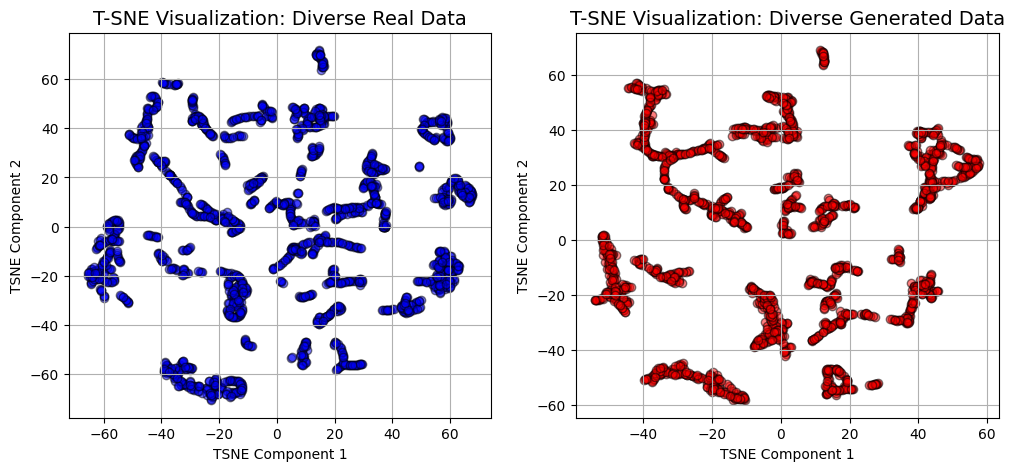

In [122]:
visualize_tsne_diverse_samples(model, train_loader)

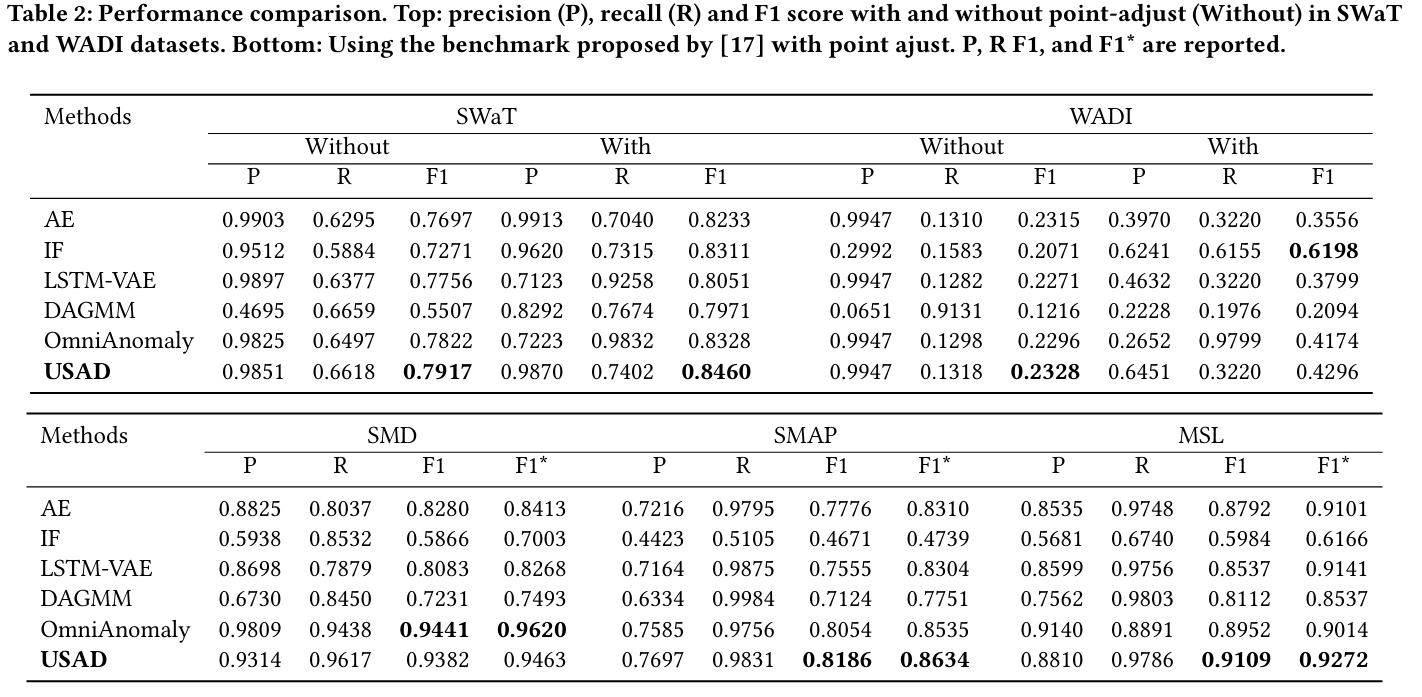
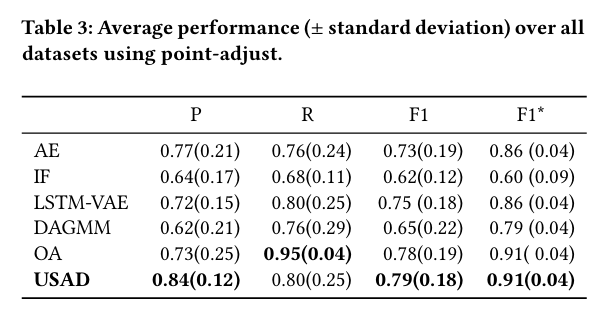